In [1]:
from emnist import extract_training_samples

print("Imported the EMNIST libraries we need!")

Imported the EMNIST libraries we need!


In [2]:
# Grab the data from the OpenML website
# X will be our images and y will be the labels
X_letter, y_letter = extract_training_samples('letters')
X_digits, y_digits = extract_training_samples('digits')

Image Label: 7
Image index: 7


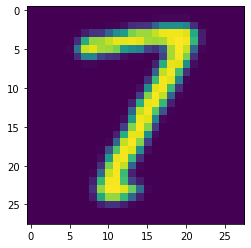

In [3]:
import matplotlib.pyplot as plt

# lets view the some data
img_index = 29 # <<<<<  You can update this value to look at other images
img = X_digits[img_index]
print("Image Label: " + str(chr(y_digits[img_index]+48)))
print("Image index: " + str(y_digits[img_index]))
plt.imshow(img.reshape((28,28)))

Image Label: a
Image index: 1


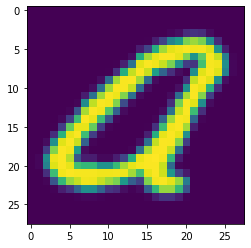

In [4]:
img_index = 29 # <<<<<  You can update this value to look at other images
img = X_letter[img_index]
print("Image Label: " + str(chr(y_letter[img_index]+96)))
print("Image index: " + str(y_letter[img_index]))
plt.imshow(img.reshape((28,28)))

In [5]:
#labels of letters

# dataframe.size
size_letter = y_letter.size

# dataframe.shape
shape_letter = y_letter.shape


# printing size and shape
print("Size = {}\nShape ={}\nShape[0]= {}".
format(size_letter, shape_letter, shape_letter[0]))

Size = 124800
Shape =(124800,)
Shape[0]= 124800


In [6]:
# importing numpy module
import numpy as np

Image Label: v
Image index: 70


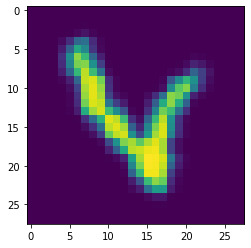

In [7]:
# we will be combining both the dataset so
# now the index of letters need to be changes as they are clashing with that of the digits

y_letter_update = np.empty(size_letter, dtype=int)
for i in range(size_letter):
    y_letter_update[i] = y_letter[i] + 48

img_index = 239 # <<<<<  You can update this value to look at other images
img = X_letter[img_index]
print("Image Label: " + str(chr(y_letter_update[img_index]+48)))
print("Image index: " + str(y_letter_update[img_index]))
plt.imshow(img.reshape((28,28)))

In [8]:
# final set that contains both digits and letters
X, y= X_digits, y_digits

X = np.concatenate((X, X_letter))
y = np.concatenate((y, y_letter_update))


# Make sure that every pixel in all of the images is a value between 0 and 1
X = X / 255.

In [9]:
# Dividing the dataset into training and testing 
# Using train/test split 
from sklearn.model_selection import train_test_split

# spliting our data randomly into roughly 70% used for training the model and 30% for testing the model
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=42) 

print("Extracted our samples and divided our training and testing data sets")

Extracted our samples and divided our training and testing data sets


In [10]:
# dataframe.size
size_train = X_train.size

# dataframe.shape
shape_train = X_train.shape


# printing size and shape
print("Size = {}\nShape ={}\nShape[0] x Shape[1] x Shape[2] = {}".
format(size_train, shape_train, shape_train[0]*shape_train[1]*shape_train[2]))

Size = 200202240
Shape =(255360, 28, 28)
Shape[0] x Shape[1] x Shape[2] = 200202240


In [11]:
# dataframe.size
size_test = X_test.size

# dataframe.shape
shape_test = X_test.shape


# printing size and shape
print("Size = {}\nShape ={}\nShape[0] x Shape[1] x Shape[2] = {}".
format(size_test, shape_test, shape_test[0]*shape_test[1]*shape_test[2]))

Size = 85800960
Shape =(109440, 28, 28)
Shape[0] x Shape[1] x Shape[2] = 85800960


In [12]:
# There is one other thing we need to do, we need to
# record the number of samples in each dataset and the number of pixels in each image
X_train = X_train.reshape(shape_train[0],shape_train[1]*shape_train[2])
X_test = X_test.reshape(shape_test[0],shape_test[1]*shape_test[2])

# Our data set contains images in 28*28 pixels which we have converted or reshaped into a one dimensional array or size 784
# 28*28 = 784

Image Label: 5


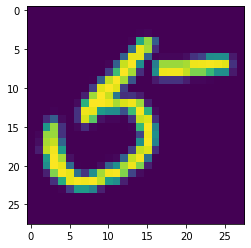

In [13]:
img_index = 189 # <<<<<  You can update this value to look at other images
img = X_train[img_index]
print("Image Label: " + str(chr(y_train[img_index]+48)))
plt.imshow(img.reshape((28,28)))

In [14]:
# These two lines import the ML libraries we need
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# This creates our first MLP with 1 hidden layer with 100 neurons and sets it to run through the data 100 times
mlp1 = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

print("Created our first MLP network")

Created our first MLP network


In [15]:
#now we are training our model mlp1 over our train data set
mlp1.fit(X_train, y_train)
print("Training set score: %f" % mlp1.score(X_train, y_train))
print("Test set score: %f" % mlp1.score(X_test, y_test))

Iteration 1, loss = 0.64505632
Iteration 2, loss = 0.44338139
Iteration 3, loss = 0.40540569
Iteration 4, loss = 0.38393876
Iteration 5, loss = 0.37022649
Iteration 6, loss = 0.35799170
Iteration 7, loss = 0.35114432
Iteration 8, loss = 0.34422875
Iteration 9, loss = 0.33908236
Iteration 10, loss = 0.33333763
Iteration 11, loss = 0.32923796
Iteration 12, loss = 0.32516674
Iteration 13, loss = 0.32235350
Iteration 14, loss = 0.31919429
Iteration 15, loss = 0.31706495
Iteration 16, loss = 0.31390563
Iteration 17, loss = 0.31194928
Iteration 18, loss = 0.31066533
Iteration 19, loss = 0.30879622
Iteration 20, loss = 0.30620884
Iteration 21, loss = 0.30452109
Iteration 22, loss = 0.30366310
Iteration 23, loss = 0.30131472
Iteration 24, loss = 0.30046756
Iteration 25, loss = 0.29949766
Iteration 26, loss = 0.29667566
Iteration 27, loss = 0.29585905
Iteration 28, loss = 0.29400311
Iteration 29, loss = 0.29125091
Iteration 30, loss = 0.29215801
Iteration 31, loss = 0.29072722
Iteration 32, los

/home/aman/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training set score: 0.919243
Test set score: 0.873401


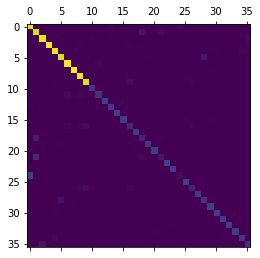

In [16]:
# First let's initialize a list with all the predicted values from the training set
y_pred = mlp1.predict(X_test)

# Now let's visualize the errors between the predictions and the actual labels using a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)

In [17]:
# You can change this to any letters that you think the neural network may have confused...
predicted_letter = 'w'
actual_letter = 'm'


# This code counts all mistakes for the letters above
mistake_list = []
for i in range(len(y_test)):
  if (y_test[i] == (ord(actual_letter) - 48) and y_pred[i] == (ord(predicted_letter) - 48)):
    mistake_list.append(i)
print("There were " + str(len(mistake_list)) + " times that the letter " + actual_letter + " was predicted to be the letter " + predicted_letter + ".")

# Once we know how many mistakes were made, we can change this to see an image of a particular one
mistake_to_show = 4 # <<< e.g., change this to 3 if you want to see the 4th mistake

# This code checks that the number mistake you asked for can be shown and if so, displays an image of it
if (len(mistake_list)> mistake_to_show):
  img = X_test[mistake_list[mistake_to_show]]
  plt.imshow(img.reshape((28,28)))
else:
  print("Couldn't show mistake number " + str(mistake_to_show + 1) + " because there were only " + str(len(mistake_list)) + " mistakes to show!")

There were 4 times that the letter m was predicted to be the letter w.
Couldn't show mistake number 5 because there were only 4 mistakes to show!


In [ ]:
# Change some of the values in the below statement and re-run to increase the accuracy of the model
# affect performance!
mlp2 = MLPClassifier(hidden_layer_sizes=(100,150,200,200,150,100,), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 0.83048463
Iteration 2, loss = 0.47065108
Iteration 3, loss = 0.41695923
Iteration 4, loss = 0.38915720
Iteration 5, loss = 0.37061135
Iteration 6, loss = 0.35634802
Iteration 7, loss = 0.34751046
Iteration 8, loss = 0.34155002
Iteration 9, loss = 0.33380147
Iteration 10, loss = 0.33021746
Iteration 11, loss = 0.32681093
Iteration 12, loss = 0.32413861
Iteration 13, loss = 0.32061748
Iteration 14, loss = 0.31651869
Iteration 15, loss = 0.31600608
Iteration 16, loss = 0.31382731
Iteration 17, loss = 0.31345876
Iteration 18, loss = 0.31541240
Iteration 19, loss = 0.31412987
Iteration 20, loss = 0.31104586
Iteration 21, loss = 0.30761805
Iteration 22, loss = 0.30815824
Iteration 23, loss = 0.31097334
Iteration 24, loss = 0.31149450
Iteration 25, loss = 0.31033777
Iteration 26, loss = 0.30990079
Iteration 27, loss = 0.30797072
Iteration 28, loss = 0.31155200
Iteration 29, loss = 0.31260761
Iteration 30, loss = 0.30945102
Iteration 31, loss = 0.31457168
Iteration 32, los

In [ ]:
# First let's initialize a list with all the predicted values from the training set
y_pred2 = mlp2.predict(X_test)

# Now let's visualize the errors between the predictions and the actual labels using a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
plt.matshow(cm)

In [ ]:
# You can change this to any letters that you think the neural network may have confused...
predicted_letter = 'w'
actual_letter = 'm'


# This code counts all mistakes for the letters above
mistake_list = []
for i in range(len(y_test)):
  if (y_test[i] == (ord(actual_letter) - 48) and y_pred2[i] == (ord(predicted_letter) - 48)):
    mistake_list.append(i)
print("There were " + str(len(mistake_list)) + " times that the letter " + actual_letter + " was predicted to be the letter " + predicted_letter + ".")

# Once we know how many mistakes were made, we can change this to see an image of a particular one
mistake_to_show = 4 # <<< e.g., change this to 3 if you want to see the 4th mistake

# This code checks that the number mistake you asked for can be shown and if so, displays an image of it
if (len(mistake_list)> mistake_to_show):
  img = X_test[mistake_list[mistake_to_show]]
  plt.imshow(img.reshape((28,28)))
else:
  print("Couldn't show mistake number " + str(mistake_to_show + 1) + " because there were only " + str(len(mistake_list)) + " mistakes to show!")

In [ ]:
# Puts all the data in the "files" variable
import os
path, dirs, files = next(os.walk("/home/aman/Documents/Mini Projects/CHARACTER-RECOGNITION/lab1-neural-networks/letters_mod/"))
files.sort()

In [ ]:
# These libraries let us import the letters, resize them, and print them out
import cv2
import matplotlib.pyplot as plt

# This code processes all the scanned images and adds them to the handwritten_story
handwritten_story = []
for i in range(len(files)):
  img = cv2.imread("/home/aman/Documents/Mini Projects/CHARACTER-RECOGNITION/lab1-neural-networks/letters_mod/"+files[i],cv2.IMREAD_GRAYSCALE)
  handwritten_story.append(img)

print("Imported the scanned images.")

plt.imshow(handwritten_story[4])  #<--- Change this index to see different letters


In [ ]:
# These are libraries we need to do some math on the image
# to be able to give it to the MLP in the right format and to resize it to 28x28 pixels
import numpy
import cv2

typed_story = ""
for letter in handwritten_story:
    letter = cv2.resize(letter, (28,28), interpolation = cv2.INTER_CUBIC)
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+48))
    
print("Conversion to typed story complete!")
print(typed_story)

In [ ]:
# This is a library we need to do some math on the image to be able to give it to the MLP in the right format
import numpy

typed_story = ""
for letter in handwritten_story:
  letter = cv2.resize(letter, (28,28), interpolation = cv2.INTER_CUBIC)
    
  #this bit of code checks to see if the image is just a blank space by looking at the color of all the pixels summed
  total_pixel_value = 0
  for j in range(28):
    for k in range(28):
      total_pixel_value += letter[j,k]
  if total_pixel_value < 20:
    typed_story = typed_story + " "
  else:         #if it NOT a blank, it actually runs the prediction algorithm on it
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+48))
    
print("Conversion to typed story complete!")
print(typed_story)

In [ ]:
# These steps process the scanned images to be in the same format and have the same properties as the EMNIST images
# They are described by the EMNIST authors in detail here: https://arxiv.org/abs/1702.05373v1
processed_story = []

for img in handwritten_story:
  #step 1: Apply Gaussian blur filter
  img = cv2.GaussianBlur(img, (7,7), 0)
  
  #steps 2 and 3: Extract the Region of Interest in the image and center in square
  points = cv2.findNonZero(img)
  x, y, w, h = cv2.boundingRect(points)
  if (w > 0 and h > 0):
    if w > h:
      y = y - (w-h)//2
      img = img[y:y+w, x:x+w]
    else:
      x = x - (h-w)//2
      img = img[y:y+h, x:x+h]
     
  #step 4: Resize and resample to be 28 x 28 pixels
  img = cv2.resize(img, (28,28), interpolation = cv2.INTER_CUBIC)
  
  #step 5: Normalize pixels and reshape before adding to the new story array
  img = img/255
  img = img.reshape((28,28))
  processed_story.append(img)

print("Processed the scanned images.")

import matplotlib.pyplot as plt
plt.imshow(processed_story[4]) #<<< change this index if you want to see a different letter from the story

In [ ]:
# This is a library we need to do some math on the image to be able to give it to the MLP in the right format
import numpy

typed_story = ""
for letter in processed_story:
  #this bit of code checks to see if the image is just a blank space by looking at the color of all the pixels summed
  total_pixel_value = 0
  for j in range(28):
    for k in range(28):
      total_pixel_value += letter[j,k]
  if total_pixel_value < 20:
    typed_story = typed_story + " "
  else:         #if it NOT a blank, it actually runs the prediction algorithm on it
    single_item_array = (numpy.array(letter)).reshape(1,784)
    prediction = mlp2.predict(single_item_array)
    typed_story = typed_story + str(chr(prediction[0]+48))
    
print("Conversion to typed story complete!")
print(typed_story)